In [1]:
import os
os.environ["OCR_AGENT"] = "pytesseract"

import pytesseract
pytesseract.pytesseract.tesseract_cmd = r"C:\Users\Techno Shield\AppData\Local\Programs\Tesseract-OCR\tesseract.exe"

from unstructured.partition.pdf import partition_pdf


c:\Users\Techno Shield\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
file_path = "./content/chapter3.pdf"
chunks = partition_pdf(
    filename=file_path,
    infer_table_structure=True,
    strategy="hi_res",
    extract_image_block_types=['Image'],
    extract_image_block_to_payload=True,
    chunking_strategy='by_title',
    max_characters=10000,
    combine_text_under_n_chars=2000,
    new_after_n_chars=6000
)


The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


In [3]:
set([str(type(el)) for el in chunks])

{"<class 'unstructured.documents.elements.CompositeElement'>"}

In [4]:
chunks[0].to_dict()

{'type': 'CompositeElement',
 'element_id': 'de91ac8508f09510de3fb44bb85d475b',
 'text': "Maham Faisal Khan Senior Data Scientist\n\nXK datacamp\n\nDiscovering activation functions\n\nINTRODUCTION TO DEEP LEARNING WITH PYTORCH\n\n©\n\nLimitations of the sigmoid and softmax function\n\nSigmoid functions:\n\ne Bounded between O and 1\n\ne Can be used anywhere in the network\n\nGradients:\n\ne Approach zero for low and high values of x\n\ne Cause function to saturate\n\nSigmoid function saturation can lead to vanishing gradients during backpropagation.\n\nUpper bound y = 1 Lower bound y = 0\n\nThis is also a problem for softmax.\n\nINTRODUCTION TO DEEP LEARNING WITH PYTORCH\n\nIntroducing ReLU\n\nRectified Linear Unit (ReLU):\n\ne f(x) = max(x, 0)\n\ne for positive inputs, the output is equal to the input\n\ne for strictly negative inputs, the output is equal to zero\n\ne overcomes the vanishing gradients problem\n\nIn PyTorch:\n\nrelu = nn.ReLU()\n\noOo F NY WwW Ff UU oOo NSN Bw | co | f

In [5]:
chunks[0].metadata.orig_elements

In [6]:
elements = chunks[3].metadata.orig_elements
chunk_images = [el for el in elements if 'Image' in str(type(el)) ]
chunk_images[0].to_dict()

{'type': 'Image',
 'element_id': '7c5b74d2-2bff-40e7-afbc-4b957c1a8f4f',
 'text': 'INTRODUCTION TO DEEP LEARNING WITH PYTORCH',
 'metadata': {'detection_class_prob': 0.6865167021751404,
  'coordinates': {'points': ((1728.85595703125, 1805.8916015625),
    (1728.85595703125, 1870.804931640625),
    (3350.2998046875, 1870.804931640625),
    (3350.2998046875, 1805.8916015625)),
   'system': 'PixelSpace',
   'layout_width': 3403,
   'layout_height': 1917},
  'last_modified': '2025-07-27T02:21:21',
  'filetype': 'PPM',
  'languages': ['eng'],
  'page_number': 25,
  'image_base64': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCABBBlUDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlq

In [7]:
chunks[0].metadata.image_base64

### seperate extracted elements into tables , texts  and images 

In [8]:
tables =[]
texts = []

for chunk in chunks:
    if 'Table' in str(type(chunk)):
        tables.append(chunk)
    if 'CompositeElement' in str(type(chunk)):
        texts.append(chunk)

In [9]:
def get_images_base64(chunks):
    images_b64 = []
    for chunk in chunks:
        if 'CompositeElement' in str(type(chunk)):
            chunk_els = chunk.metadata.orig_elements
            for el in chunk_els:
                if 'Image' in str(type(el)):
                    images_b64.append(el.metadata.image_base64)
    return images_b64

images = get_images_base64(chunks)

In [10]:
images

['/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCADZANIDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD3+iiigAooooAKKKiubm3sraS5up44IIl3SSysFVR6kngCgCWo57iG1gee4mjhhQbnkkYKqj1JPSvHfF/x6sbFpLTwzbC9mHBu5wViB/2V4LfXgfWvE9f8Va54nn83WNSnusHKxscIn+6g4H4CtI029zN1Etj6N1741eENGL

In [46]:


from IPython.display import Image, display
import base64

def display_base64_image(base64_code):
    image_data = base64.b64decode(base64_code)
    display(Image(data=image_data))


# display_base64_image(images[21])

In [16]:
from langchain_groq import ChatGroq
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser

In [17]:
# Prompt
prompt_text = """
You are an assistant tasked with summarizing tables and text.
Give a concise summary of the table or text.

Respond only with the summary, no additionnal comment.
Do not start your message by saying "Here is a summary" or anything like that.
Just give the summary as it is.

Table or text chunk: {element}

"""
prompt = ChatPromptTemplate.from_template(prompt_text)

model = ChatGroq(temperature=0.5 , model='llama-3.1-8b-instant' , api_key="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",)
summarize_chain = prompt | model|StrOutputParser()


In [18]:
texts

In [19]:
texts[0].metadata.orig_elements

In [20]:
text_summarize = summarize_chain.batch(texts , {'max_concurrency':3})

tables_html = [table.metadata.text_as_html for table in tables]
table_summaries = summarize_chain.batch(tables_html, {'max_concurrency':3})

In [21]:
table_summaries

[]

In [22]:
text_summarize

['Maham Faisal Khan, a senior data scientist at XK datacamp, discusses limitations of sigmoid and softmax functions in deep learning, including vanishing gradients due to saturation. He introduces alternative activation functions: ReLU (Rectified Linear Unit), which overcomes vanishing gradients, and Leaky ReLU, which allows non-zero gradients for negative inputs. He also explains neural network architecture, including layers made of neurons, linear layers, and layer naming conventions.',
 "A neural network's capacity can be increased by adding more hidden layers, which also increases the number of parameters. The number of parameters can be manually calculated by summing the product of the number of neurons and the number of weights plus one for the bias in each layer. The total number of learnable parameters in a model can be obtained by iterating over its parameters. The learning rate and momentum are crucial parameters in the Stochastic Gradient Descent (SGD) optimizer, as bad valu

### summarize photo

In [23]:
from PIL import Image
import pytesseract
import base64
from io import BytesIO
from transformers import BlipProcessor, BlipForConditionalGeneration
import torch
from langchain_groq import ChatGroq



In [24]:
def extract_text_from_base64_images(images_b64_list):
    results = []

    for i, base64_str in enumerate(images_b64_list):
        try:
            # تنظيف وتحويل base64 إلى صورة
            clean_b64 = base64_str.strip().replace('\n', '').replace('\r', '')
            if len(clean_b64) % 4 != 0:
                clean_b64 += '=' * (4 - len(clean_b64) % 4)

            image_data = base64.b64decode(clean_b64)
            pil_image = Image.open(BytesIO(image_data)).convert("RGB")

            # OCR
            text = pytesseract.image_to_string(pil_image)
            results.append((i, text))

        except Exception as e:
            print(f"❌ Error in image {i}: {e}")
            results.append((i, ""))

    return results


In [25]:
images

['/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCADZANIDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD3+iiigAooooAKKKiubm3sraS5up44IIl3SSysFVR6kngCgCWo57iG1gee4mjhhQbnkkYKqj1JPSvHfF/x6sbFpLTwzbC9mHBu5wViB/2V4LfXgfWvE9f8Va54nn83WNSnusHKxscIn+6g4H4CtI029zN1Etj6N1741eENGL

In [26]:
images = get_images_base64(chunks)
ocr_texts = extract_text_from_base64_images(images)

for i, text in ocr_texts:
    print(f"📄 OCR from image {i}:\n{text}\n{'-'*50}")



📄 OCR from image 0:
G

--------------------------------------------------
📄 OCR from image 1:

--------------------------------------------------
📄 OCR from image 2:
INTRODUCTION TO DEEP LEARNING WITH PYTORCH

--------------------------------------------------
📄 OCR from image 3:
—— f(x) = ReLU(x)


--------------------------------------------------
📄 OCR from image 4:
INTRODUCTION TO DEEP LEARNING WITH PYTORCH

--------------------------------------------------
📄 OCR from image 5:
8) — f(x) = LeakyReLU(x)
— f(x)


--------------------------------------------------
📄 OCR from image 6:
INTRODUCTION TO DEEP LEARNING WITH PYTORCH

--------------------------------------------------
📄 OCR from image 7:

--------------------------------------------------
📄 OCR from image 8:

--------------------------------------------------
📄 OCR from image 9:
INTRODUCTION TO DEEP LEARNING WITH PYTORCH

--------------------------------------------------
📄 OCR from image 10:
>
ia)
_
a
jor
—
Bow
je)

CO)
O)
O

In [27]:
ocr_texts

[(0, 'G\n'),
 (1, ''),
 (2, 'INTRODUCTION TO DEEP LEARNING WITH PYTORCH\n'),
 (3, '—— f(x) = ReLU(x)\n\n'),
 (4, 'INTRODUCTION TO DEEP LEARNING WITH PYTORCH\n'),
 (5, '8) — f(x) = LeakyReLU(x)\n— f(x)\n\n'),
 (6, 'INTRODUCTION TO DEEP LEARNING WITH PYTORCH\n'),
 (7, ''),
 (8, ''),
 (9, 'INTRODUCTION TO DEEP LEARNING WITH PYTORCH\n'),
 (10,
  '>\nia)\n_\na\njor\n—\nBow\nje)\n\nCO)\nO)\nO)\nC)\n\n:\n\n( )—.\nO)\nO)\n\ni\n\nOwe 2.\nCREO\nCARO)\n( }—-C JC\n'),
 (11, 'INTRODUCTION TO DEEP LEARNING WITH PYTORCH\n'),
 (12, 'INTRODUCTION TO DEEP LEARNING WITH PYTORCH\n'),
 (13, ''),
 (14, 'NTRODUCTION TO DEEP LEARNING WITH PYTORCH\n'),
 (15, '@\n'),
 (16, 'INTRODUCTION TO DEEP LEARNING WITH PYTORCH\n'),
 (17, '—2.0 -1.5 -1.0 -0.5 0.0 0.5 1.0 1.5 2.0\n'),
 (18, 'INTRODUCTION TO DEEP LEARNING WITH PYTORCH\n'),
 (19,
  '—@ Optimizer steps\n—— Square function\n\n—2.0 -1.5\n\n0.0\n\n0.5\n\n1.0\n\nLS\n\n2.0\n'),
 (20, 'INTRODUCTION TO DEEP LEARNING WITH PYTORCH\n'),
 (21, '—@— Optimizer steps\n—— Sq

In [28]:
import uuid
from langchain.vectorstores import Chroma
from langchain.storage import InMemoryStore
from langchain_core.documents import Document
from langchain_huggingface import HuggingFaceEmbeddings
from langchain.retrievers.multi_vector import MultiVectorRetriever

In [29]:
# تحميل الـ Embeddings
embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")


In [30]:
vectorstore = Chroma(collection_name='multi_model_rag', embedding_function=embeddings)

C:\Users\Techno Shield\AppData\Local\Temp\ipykernel_3252\415794888.py:1: LangChainDeprecationWarning: The class `Chroma` was deprecated in LangChain 0.2.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-chroma package and should be used instead. To use it run `pip install -U :class:`~langchain-chroma` and import as `from :class:`~langchain_chroma import Chroma``.
  vectorstore = Chroma(collection_name='multi_model_rag', embedding_function=embeddings)


In [31]:
# the storage layer for the parent documents
store = InMemoryStore()
id_key ='doc_id'
# the retriver (empty to start )
retriver = MultiVectorRetriever(
    vectorstore=vectorstore,
    docstore=store,
    id_key=id_key
)

In [32]:
# add text 
doc_ids = [str(uuid.uuid4())for _ in texts]
summary_texts = [
    Document(page_content=summary , metadata={id_key :doc_ids[i]}) for i,summary in enumerate(text_summarize)
]
retriver.vectorstore.add_documents(summary_texts)
retriver.docstore.mset(list(zip(doc_ids,texts)))

In [33]:
# add tables
if tables:
    table_ids = [str(uuid.uuid4()) for _ in tables]
    summary_tables = [
        Document(page_content=summary, metadata={id_key: table_ids[i]}) for i, summary in enumerate(table_summaries)
    ]
    retriver.vectorstore.add_documents(summary_tables)
    retriver.docstore.mset(list(zip(table_ids, tables)))
else:
    print("No tables to add.")

No tables to add.


In [34]:
# add image summaries
img_ids = [str(uuid.uuid4()) for _ in images]
summary_images = [
    Document(page_content=summary[1], metadata={id_key: img_ids[i]}) for i, summary in enumerate(ocr_texts)
]
retriver.vectorstore.add_documents(summary_images)
retriver.docstore.mset(list(zip(img_ids, images)))

### Check Retrieval

In [35]:
#Retriver
chunks = retriver.invoke(
  ' Impact of the learning rate: optimal learning rate? '
)

In [36]:
for i, chunk in enumerate(chunks):
    try:
        content = chunk.page_content
    except AttributeError:
        try:
            content = chunk.get('page_content', 'No page_content found')
        except:
            content = str(chunk)
    print(f"Document {i+1}: {content}\n")


Document 1: Tweaking the number of hidden layers

e Input and output layers dimensions are fixed.

o input layer depends on the number of features n_features

° output layer depends on the number of categories n_classes

model = nn.Sequential(nn.Linear(n_features, 8),

nn.Linear(8, 4),

nn.Linear(4, n_classes))

e We can use as many hidden layers as we want

e Increasing the number of hidden layers = increasing the number of parameters = increasing the model capacity

INTRODUCTION TO DEEP LEARNING WITH PYTORCH

Counting the number of parameters

Given the following model:

Using PyTorch:

model = nn.Sequential(nn.Linear(8, 4), nn.Linear(4, 2))

e .numel() : returns the number of elements in the tensor

Manually calculating the number of parameters:

e first layer has 4 neurons, each neuron has 8+1 parameters = 56 parameters

second layer has 2 neurons, each neuron has 4+1 parameters = 10 parameters

e

total = 0

for parameter in model.parameters(): total += parameter.numel()

print (t

In [37]:
for chunk in chunks:
    print(type(chunk))

<class 'unstructured.documents.elements.CompositeElement'>
<class 'unstructured.documents.elements.CompositeElement'>
<class 'unstructured.documents.elements.CompositeElement'>
<class 'str'>


In [38]:
import fitz
import matplotlib.patches as patches
import matplotlib.pyplot as plt 
from PIL import Image

In [ ]:
def plot_pdf_with_boxes(pdf_page, segments):
    pix = pdf_page.get_pixmap()
    pil_image = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)
    
    fig, ax = plt.subplots(1, figsize=(10, 10))
    ax.imshow(pil_image)
    categories = set()
    category_to_color = {
        'Title': 'orchid',
        'Image': 'forestgreen',
        'Table': 'tomato',
        'text': 'deepskyblue'
    }
    for segment in segments:
        points = segment['coordinates']['points']
        layout_width = segment['coordinates']['layout_width']
        layout_height = segment['coordinates']['layout_height']

        # تحقق من وجود layout_width, layout_height وقيم صحيحة
        if layout_width == 0 or layout_height == 0:
            continue

        scaled_points = [
            (x * pix.width / layout_width, y * pix.height / layout_height)
            for x, y in points
        ]

        box_color = category_to_color.get(segment.get('category', 'text'), 'deepskyblue')
        categories.add(segment.get('category', 'text'))

        rect = patches.Polygon(
            scaled_points,
            linewidth=1,
            edgecolor=box_color,
            facecolor='none'
        )
        ax.add_patch(rect)

    legend_handles = [patches.Patch(color='deepskyblue', label='Text')]
    for category in ['Title', 'Image', 'Table']:
        if category in categories:
            legend_handles.append(
                patches.Patch(color=category_to_color[category], label=category)
            )

    ax.axis('off')
    ax.legend(handles=legend_handles, loc='upper right')
    plt.tight_layout()
    plt.show()
def render_page(doc_list: list, page_number: int, print_text=True) -> None:
    pdf_page = fitz.open(file_path).load_page(page_number - 1)
    page_docs = [doc for doc in doc_list if doc.get("page_number") == page_number]

    plot_pdf_with_boxes(pdf_page, page_docs)
    if print_text:
        for doc in page_docs:
            content = doc.get('page_content', None)
            if content:
                print(content)






In [40]:
for i , chunk in enumerate(chunks):
    if "CompositeElement" in str(type(chunk)):
        print('\n\nChunk'  ,i)
        for doc in chunk.metadata.orig_elements:
            print(doc.to_dict()['type'] , doc.metadata.page_number)



Chunk 0
Title 9
ListItem 9
ListItem 9
ListItem 9
NarrativeText 9
UncategorizedText 9
NarrativeText 9
ListItem 9
NarrativeText 9
Image 9
Title 10
NarrativeText 10
NarrativeText 10
NarrativeText 10
ListItem 10
NarrativeText 10
ListItem 10
ListItem 10
UncategorizedText 10
NarrativeText 10
ListItem 10
UncategorizedText 10
Image 10
ListItem 10
Image 10
UncategorizedText 11
NarrativeText 11
NarrativeText 12
Footer 12
Title 12
NarrativeText 12
UncategorizedText 12
Image 12
Title 13
ListItem 13
Title 13
NarrativeText 13
ListItem 13
ListItem 13
ListItem 13
ListItem 13
ListItem 13
ListItem 13
Image 13
Title 14
Image 14
Image 14
Title 15
Image 15
Image 15
Title 16
Image 16
Image 16


Chunk 1
Title 25
ListItem 25
ListItem 25
ListItem 25
ListItem 25
NarrativeText 25
NarrativeText 25
NarrativeText 25
ListItem 25
NarrativeText 25
NarrativeText 25
Image 25
UncategorizedText 26
NarrativeText 26


Chunk 2
NarrativeText 1
Footer 1
Title 1
NarrativeText 1
UncategorizedText 1
Image 1
Title 2
Title 2
List

In [41]:
from langchain_core.documents import Document

def extract_page_numbers_from_chunks(chunk):
    elements = chunk.metadata.orig_elements
    page_numbers = set()
    for element in elements:
        page_numbers.add(element.metadata.page_number)
    return page_numbers


# def display_chunk_pages(chunk, pdf_path=file_path, print_text=True):
#     elements = chunk.metadata.orig_elements
#     segments = []

#     # تجهيز كل عنصر كـ segment ببياناته
#     for element in elements:
#         metadata = element.metadata.to_dict()
#         if 'coordinates' not in metadata:
#             continue

#         # تصنيف العنصر
#         if 'Table' in str(type(element)):
#             metadata['category'] = 'Table'
#         elif 'Image' in str(type(element)):
#             metadata['category'] = 'Image'
#         else:
#             metadata['category'] = 'text'

#         # تأكيد رقم الصفحة
#         metadata['page_number'] = int(element.metadata.page_number)
#         segments.append(metadata)

#     # صفحات فريدة ضمن الـ chunk
#     page_numbers = extract_page_numbers_from_chunks(chunk)

#     # عرض كل صفحة مع مستطيلاتها
#     for page_num in sorted(page_numbers):
#         print(f"\n📄 Displaying page {page_num}")
#         render_page(segments, page_number=page_num, print_text=print_text)

   
def display_chunk_pages_with_text(chunk, pdf_path=file_path, print_text=True):
    elements = chunk.metadata.orig_elements
    segments = []

    for element in elements:
        metadata = element.metadata.to_dict()
        if 'coordinates' not in metadata:
            continue

        # تصنيف العنصر
        if 'Table' in str(type(element)):
            metadata['category'] = 'Table'
        elif 'Image' in str(type(element)):
            metadata['category'] = 'Image'
        else:
            metadata['category'] = 'text'

        # رقم الصفحة
        page_num = int(element.metadata.page_number)
        metadata['page_number'] = page_num
        segments.append(metadata)

        # عرض الصفحة التي يحتوي عليها العنصر مع محتواه
        if print_text:
            print(f"\n--- Page: {page_num} ---")
            print(f"Content:\n{element.page_content if hasattr(element, 'page_content') else 'No text content'}")

    # بعد عرض كل العناصر، ممكن تعرض الصفحات بالرسم
    unique_pages = sorted(set([seg['page_number'] for seg in segments]))
    pdf_document = fitz.open(pdf_path)

    for page_num in unique_pages:
        print(f"\n📄 Displaying page {page_num}")
        page_segments = [seg for seg in segments if seg['page_number'] == page_num]
        render_page(page_segments, page_number=page_num, print_text=False)  # Text سبق واطبعناه فوق



--- Page: 9 ---
Content:
No text content

--- Page: 9 ---
Content:
No text content

--- Page: 9 ---
Content:
No text content

--- Page: 9 ---
Content:
No text content

--- Page: 9 ---
Content:
No text content

--- Page: 9 ---
Content:
No text content

--- Page: 9 ---
Content:
No text content

--- Page: 9 ---
Content:
No text content

--- Page: 9 ---
Content:
No text content

--- Page: 9 ---
Content:
No text content

--- Page: 10 ---
Content:
No text content

--- Page: 10 ---
Content:
No text content

--- Page: 10 ---
Content:
No text content

--- Page: 10 ---
Content:
No text content

--- Page: 10 ---
Content:
No text content

--- Page: 10 ---
Content:
No text content

--- Page: 10 ---
Content:
No text content

--- Page: 10 ---
Content:
No text content

--- Page: 10 ---
Content:
No text content

--- Page: 10 ---
Content:
No text content

--- Page: 10 ---
Content:
No text content

--- Page: 10 ---
Content:
No text content

--- Page: 10 ---
Content:
No text content

--- Page: 10 ---
Con

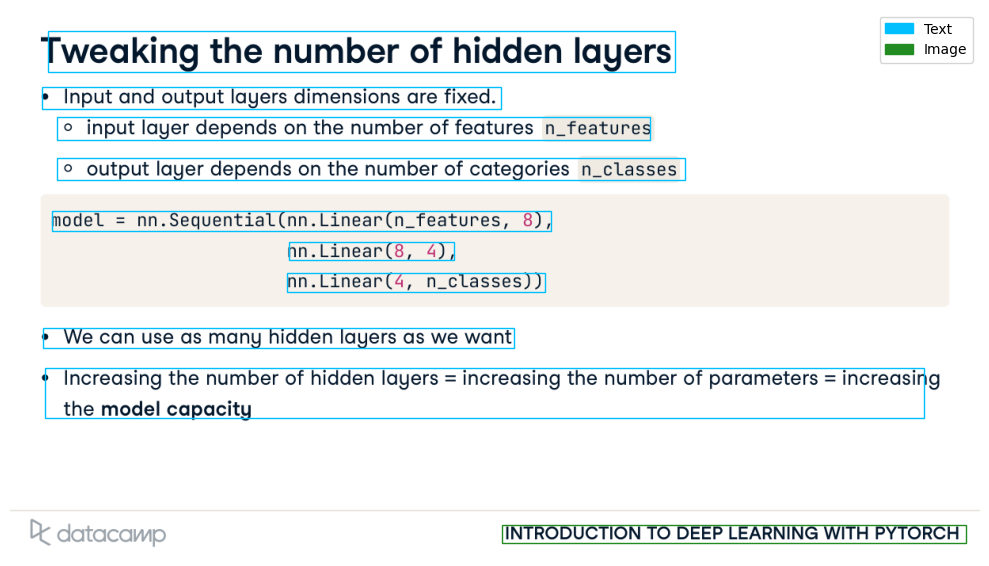


📄 Displaying page 10


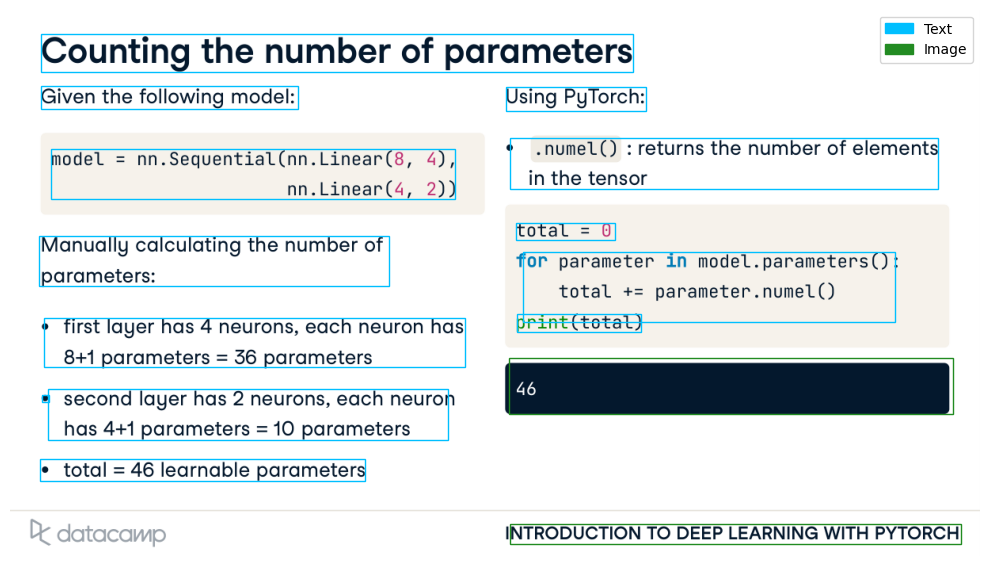


📄 Displaying page 11


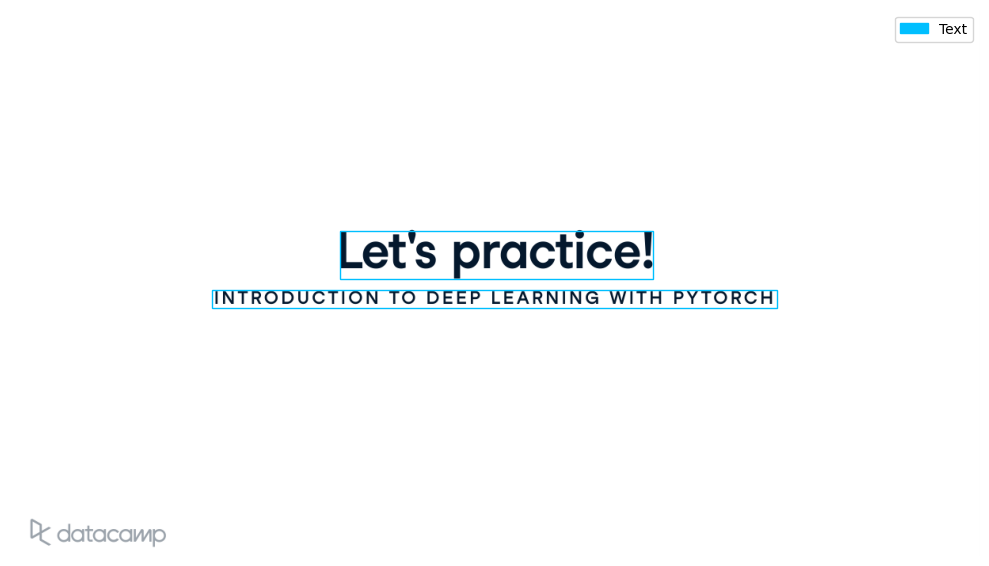


📄 Displaying page 12


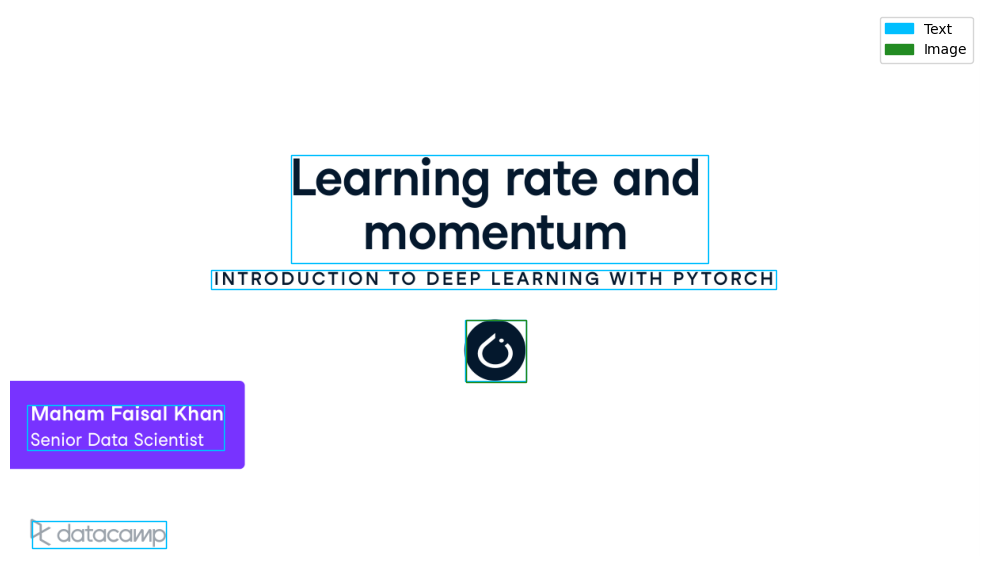


📄 Displaying page 13


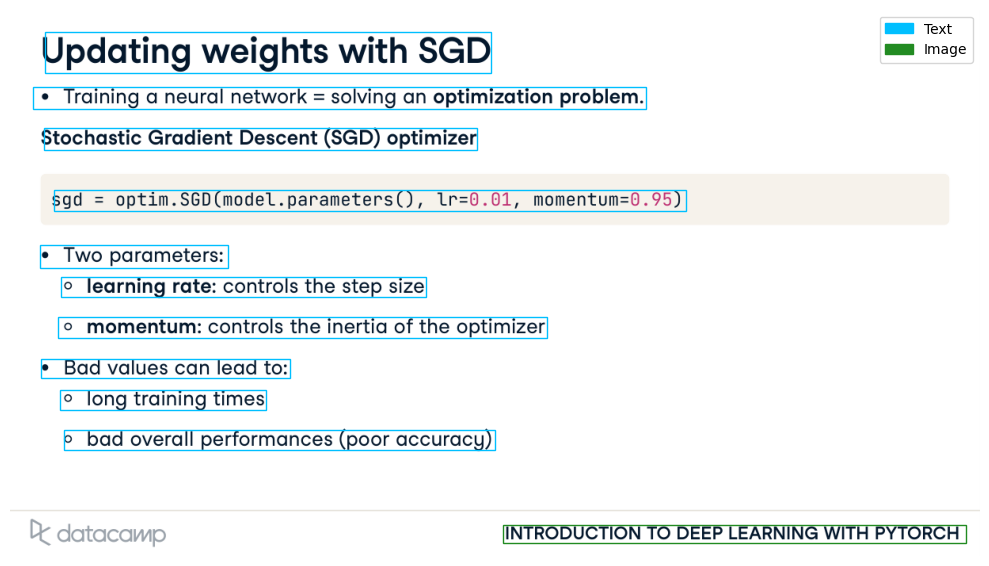


📄 Displaying page 14


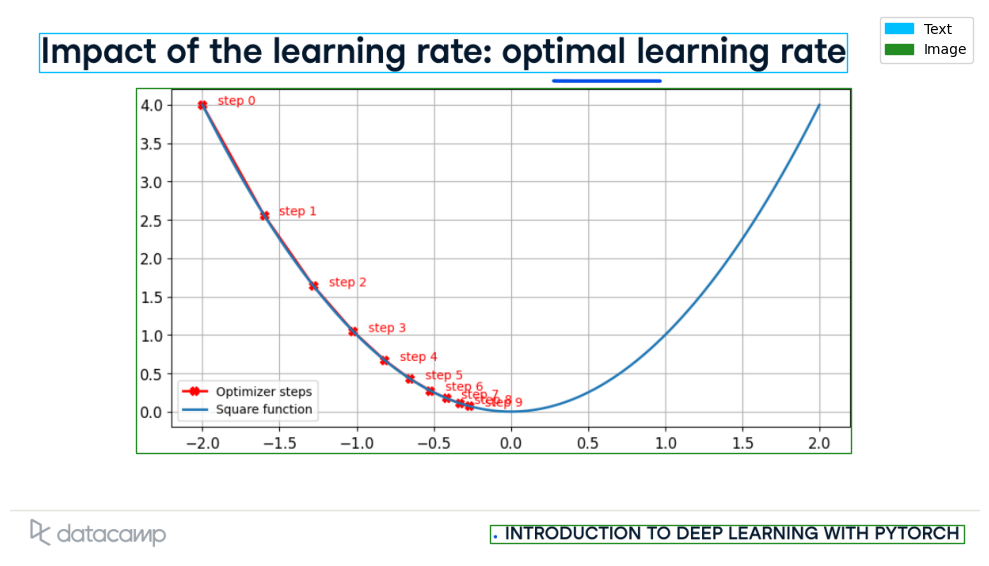


📄 Displaying page 15


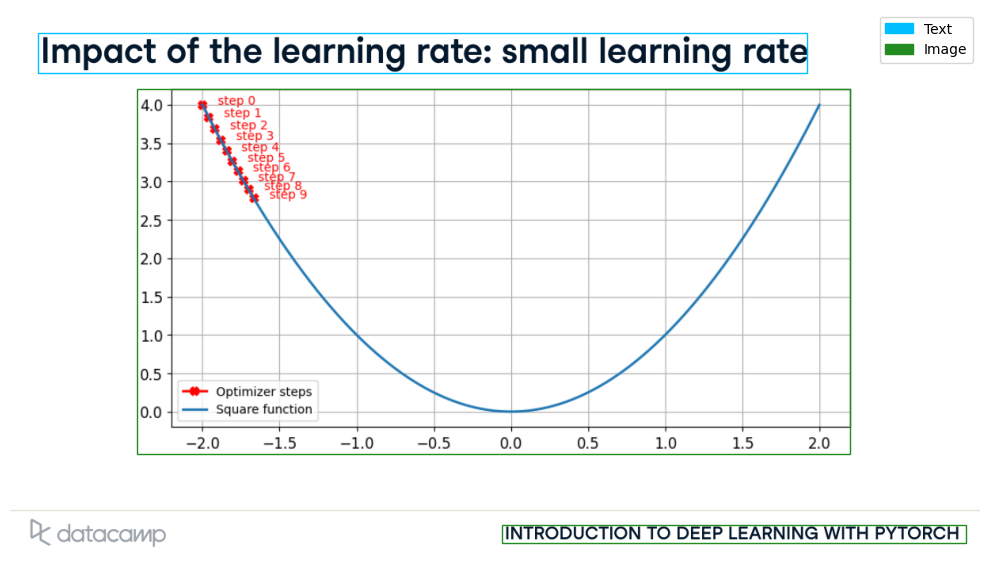


📄 Displaying page 16


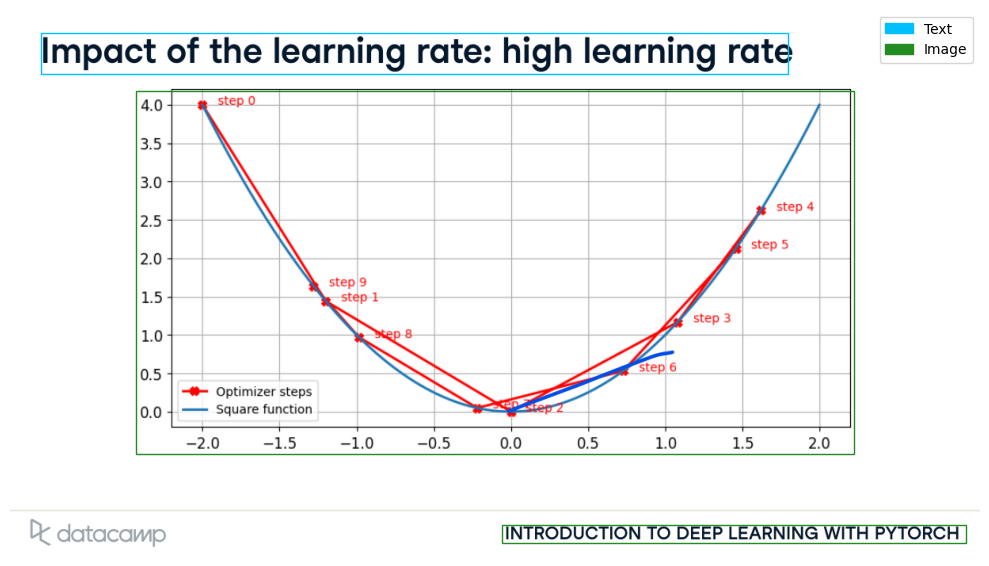

In [42]:
# عرض الصفحة الخاصة بالـ chunk
display_chunk_pages_with_text(chunks[0])


### RAG pipeline

In [43]:
from langchain_core.runnables import RunnablePassthrough, RunnableLambda
from langchain_core.messages import HumanMessage
from langchain_groq import ChatGroq
from base64 import b64decode
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnableLambda


# 🧠 1. تقسيم المستندات إلى صور base64 ونصوص
def parse_docs(docs):
    b64 = []
    text = []
    for doc in docs:
        try:
            b64decode(doc)
            b64.append(doc)
        except Exception:
            text.append(doc)
    return {"images": b64, "texts": text}


from langchain_core.messages import HumanMessage

def build_prompt(kwargs):
    docs_by_type = kwargs["context"]
    user_question = kwargs["question"]

    context_text = ""
    if len(docs_by_type["texts"]) > 0:
        for text_element in docs_by_type["texts"]:
            context_text += text_element.text + "\n"

    if len(docs_by_type["images"]) > 0:
        context_text += "\nImages included:\n"
        for i, image in enumerate(docs_by_type["images"], start=1):
            context_text += f"[Image {i} base64]: data:image/jpeg;base64,{image[:30]}... (truncated)\n"
    else:
        print('no images')

    prompt = f"""
Answer the question based only on the following context, which can include text and base64-encoded images.
Context:
{context_text}

Question: {user_question}
"""
    return [HumanMessage(content=prompt)]



# ✅ 3. السلسلة الأساسية: إدخال → معالجة الصور والنصوص → بناء prompt → Groq → إخراج
chain = (
    {
        "context": retriver | RunnableLambda(parse_docs),
        "question": RunnablePassthrough(),
    }
    | RunnableLambda(build_prompt)
    | ChatGroq(model_name="llama3-8b-8192", temperature=0, api_key="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")
    | StrOutputParser()
)

from langchain_core.runnables import RunnableMap

def keep_inputs_for_later(kwargs):
    return {"question": kwargs["question"], "context": kwargs["context"], "original_inputs": kwargs}

def wrap_response_with_context(response_and_inputs):
    return {
        "response": response_and_inputs["response"],
        "context": response_and_inputs["original_inputs"]["context"]
    }

chain_with_sources = (
    {
        "context": retriver | RunnableLambda(parse_docs),
        "question": RunnablePassthrough(),
    }
    | RunnableLambda(keep_inputs_for_later)
    | RunnableLambda(lambda d: {
        "response": ChatGroq(
            model_name="llama3-8b-8192",
            temperature=0,
            api_key="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"
        ).invoke(build_prompt(d)),
        "original_inputs": d
    })
    | RunnableLambda(wrap_response_with_context)
)



In [48]:
response = chain.invoke(
    "Limitations of the sigmoid and softmax function? "
)

print(response)

According to the context, the limitations of the sigmoid and softmax function are:

* Sigmoid function:
	+ Bounded between 0 and 1
	+ Can be used anywhere in the network
	+ Gradients approach zero for low and high values of x, causing function to saturate
	+ Sigmoid function saturation can lead to vanishing gradients during backpropagation
* Softmax function:
	+ Also suffers from the same problem as sigmoid function, causing vanishing gradients during backpropagation


### 🧠 **Response**:
content='According to the context, Introducing Leaky ReLU is a section that discusses the Leaky ReLU activation function. The text states:\n\n"Leaky ReLU:\n\ne For positive inputs, it behaves similarly to ReLU\n\ne For negative inputs, it multiplies the input by a small coefficient (defaulted to 0.01)\n\ne The gradients for negative inputs are never null\n\nIn PyTorch:\n\nLeaky_relu = nn.LeakyReLU(negative_slope = 0.05)"' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 102, 'prompt_tokens': 686, 'total_tokens': 788, 'completion_time': 0.168058365, 'prompt_time': 0.250472149, 'queue_time': 0.5061041180000001, 'total_time': 0.418530514}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_0fb809dba3', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None} id='run--bd2af63d-4576-4105-b4d2-93baddeca4d2-0' usage_metadata={'input_tokens': 686, 'output_tokens': 102, 'total_tokens': 788}

## 📄 Context Texts

**Text 1 (Page 1):**

Maham Faisal Khan Senior Data Scientist

XK datacamp

Discovering activation functions

INTRODUCTION TO DEEP LEARNING WITH PYTORCH

©

Limitations of the sigmoid and softmax function

Sigmoid functions:

e Bounded between O and 1

e Can be used anywhere in the network

Gradients:

e Approach zero for low and high values of x

e Cause function to saturate

Sigmoid function saturation can lead to vanishing gradients during backpropagation.

Upper bound y = 1 Lower bound y = 0

This is also a problem for softmax.

INTRODUCTION TO DEEP LEARNING WITH PYTORCH

Introducing ReLU

Rectified Linear Unit (ReLU):

e f(x) = max(x, 0)

e for positive inputs, the output is equal to the input

e for strictly negative inputs, the output is equal to zero

e overcomes the vanishing gradients problem

In PyTorch:

relu = nn.ReLU()

oOo F NY WwW Ff UU oOo NSN Bw | co | fe)) | LS | N fo) N a fe)) co

INTRODUCTION TO DEEP LEARNING WITH PYTORCH

Introducing Leaky ReLU

Leaky ReLU:

e For positive inputs, it behaves similarly to ReLU

e For negative inputs, it multiplies the input by a small coefficient (defaulted to 0.01)

e The gradients for negative inputs are never null

In PyTorch:

Leaky_relu = nn.LeakyReLU(negative_slope = 0.05)

—— f(x) = LeakyReLU(x) —— f(x)

INTRODUCTION TO DEEP LEARNING WITH PYTORCH

Let's practice!

INTRODUCTION TO DEEP LEARNING WITH PYTORCH

Maham Faisal Khan Senior Data Scientist

XK datacamp

A deeper dive into neural network architecture

INTRODUCTION TO DEEP LEARNING WITH PYTORCH

©

Layers are made of neurons

e Linear layers are fully connected

e Each neuron of a layer connected to each neuron of previous layer

e A neuron of a linear layer:

fe) computes a linear operation using all neurons of previous layer

contains N+1 learnable parameters

where N = dimension of previous layer's outputs

inputs

Ss O) a QO 0 QQ

INTRODUCTION TO DEEP LEARNING WITH PYTORCH

Layer naming convention

layer

'O

hidden

O So TP wis PEL

De datacamp

INTRODUCTION TO DEEP LEARNING WITH PYTORCH

## 🖼️ Context Images

Image 1:


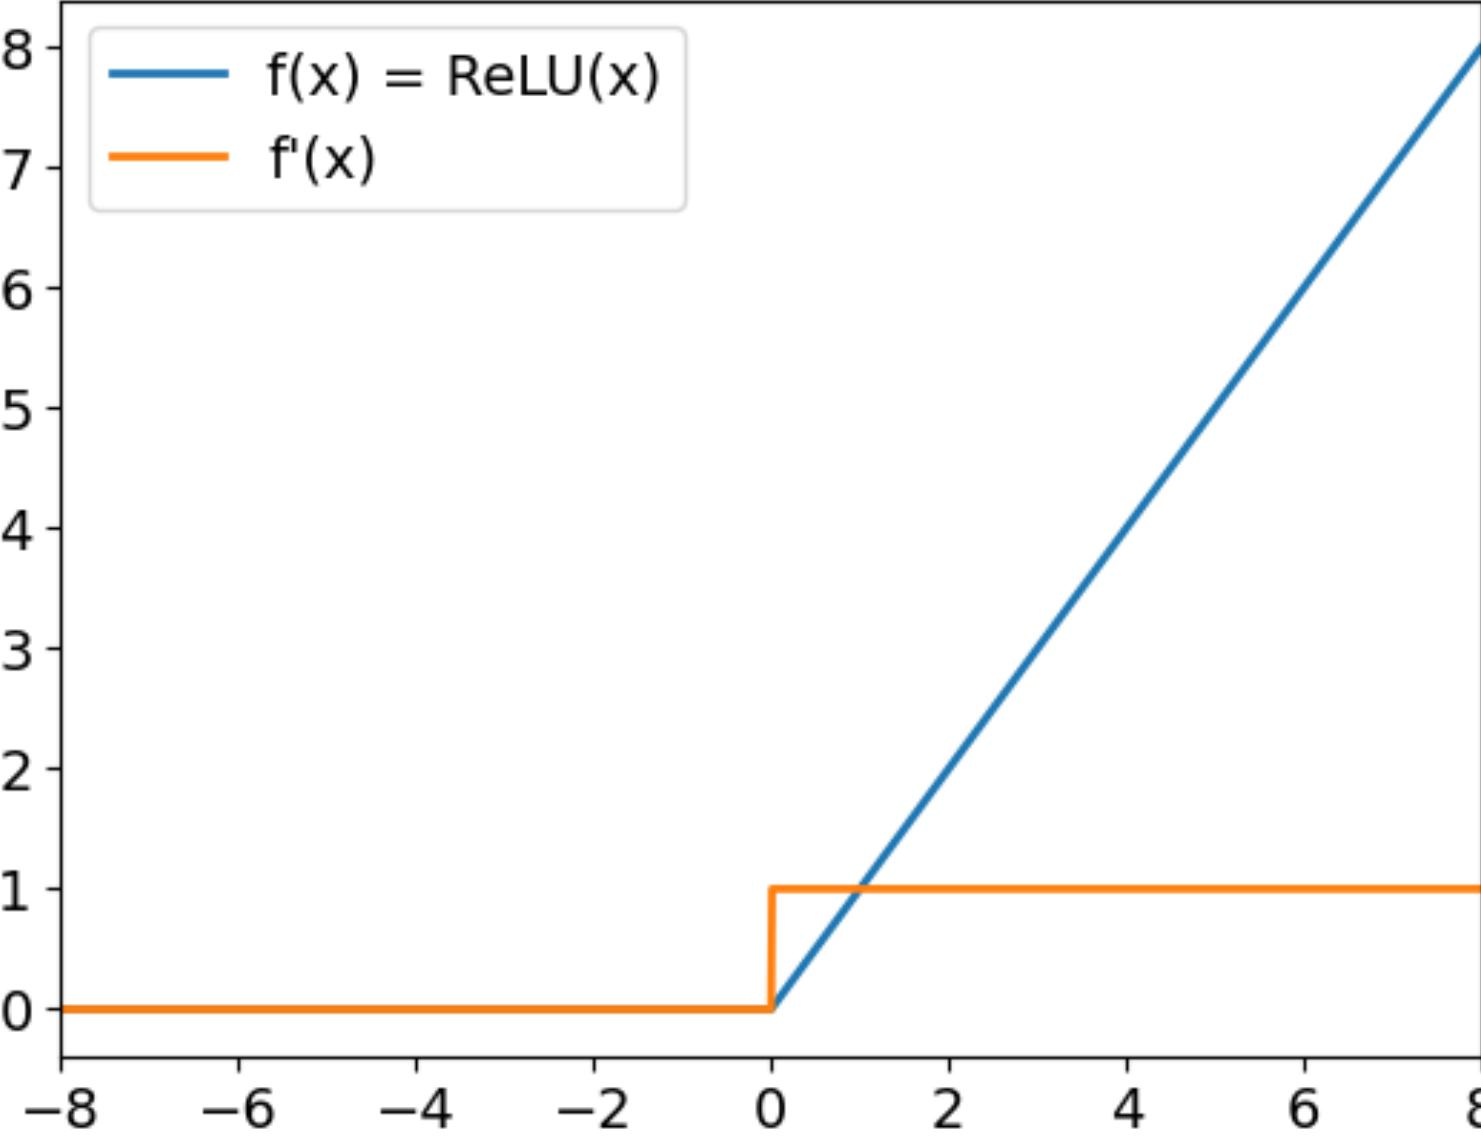

Image 2:


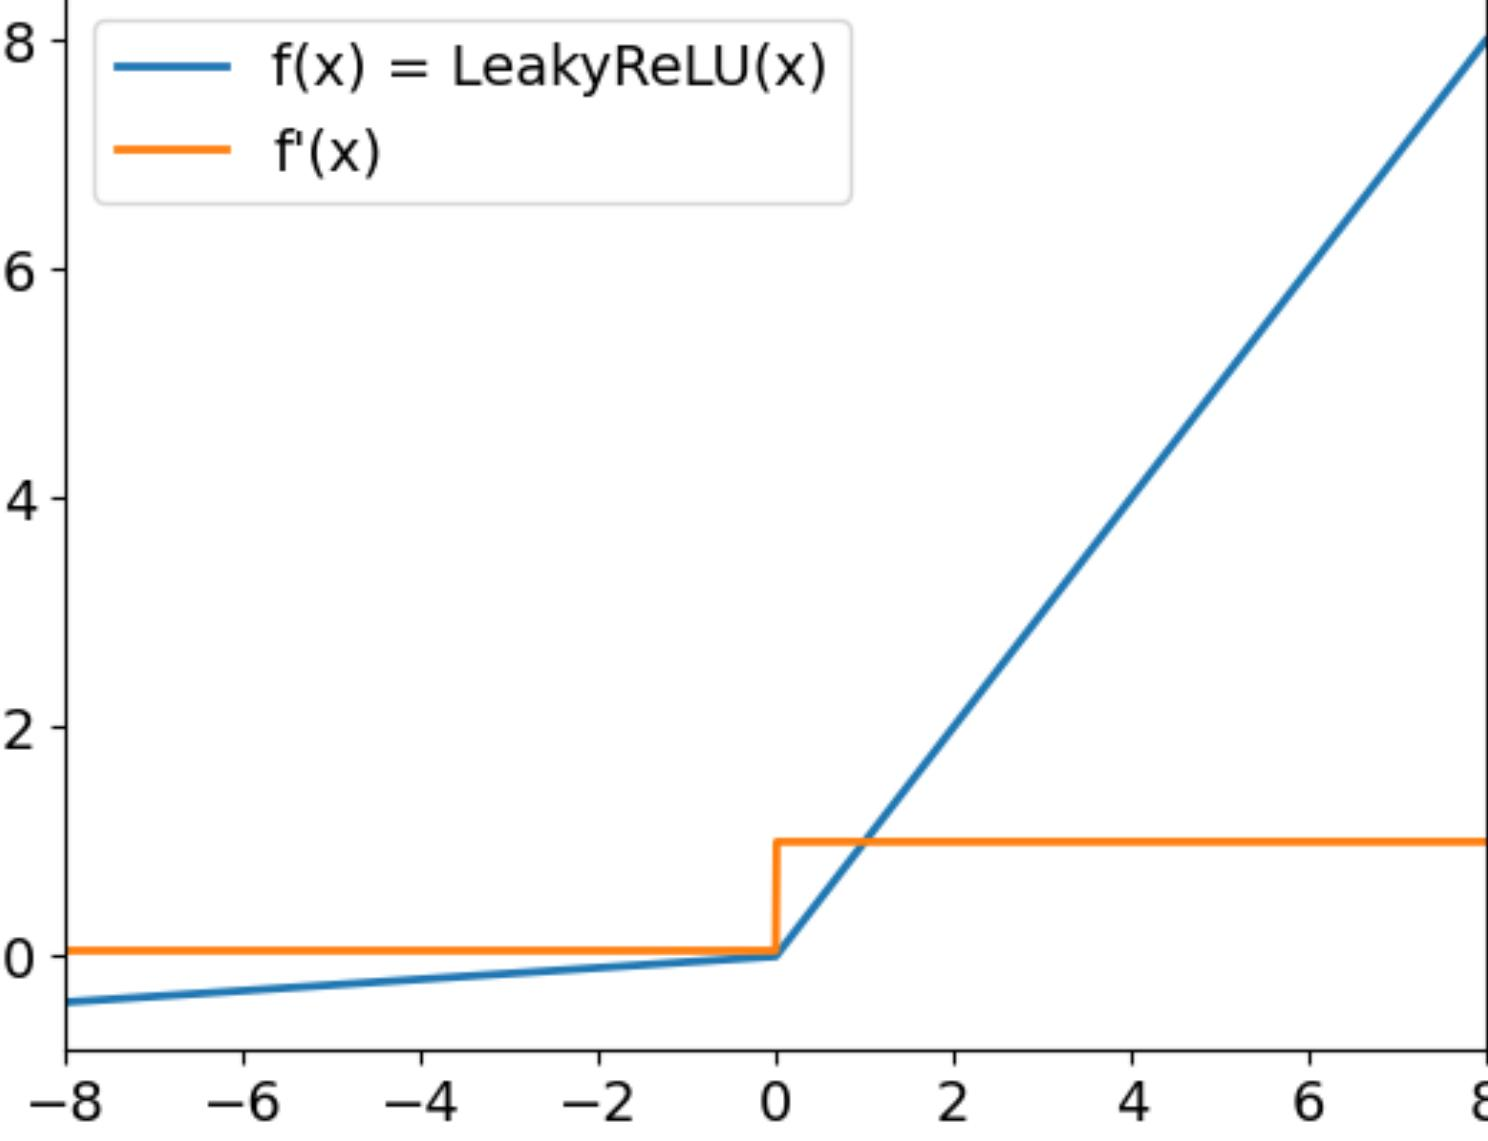

Image 3:


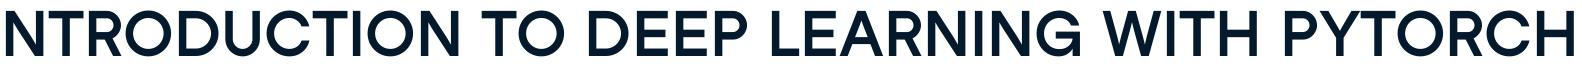

In [50]:
result = chain_with_sources.invoke("Introducing Leaky ReLU?")

from IPython.display import display, Markdown

# عرض الجواب
display(Markdown(f"### 🧠 **Response**:\n{result['response']}"))

# عرض النصوص
if result['context']['texts']:
    display(Markdown("## 📄 Context Texts"))
    for i, text in enumerate(result['context']['texts']):
        page = getattr(text.metadata, "page_number", "N/A")
        display(Markdown(f"**Text {i+1} (Page {page}):**\n\n{text.text}"))
else:
    display(Markdown("❌ No text context found"))

# عرض الصور
if result['context']['images']:
    display(Markdown("## 🖼️ Context Images"))
    for i, image_b64 in enumerate(result['context']['images']):
        print(f"Image {i+1}:")
        display_base64_image(image_b64)
else:
    display(Markdown("❌ No image context found"))
